In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df=pd.read_csv('/content/drive/MyDrive/vegetable/Vegetable_market.csv', na_values='=')
df

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,summer,apr,32,no,fresh,25
1,peas,summer,apr,33,no,fresh,100
2,radish,summer,apr,32,no,fresh,30
3,tomato,summer,apr,35,no,avarage,80
4,cabage,summer,apr,32,no,fresh,50
...,...,...,...,...,...,...,...
116,chilly,winter,oct,15,no,fresh,80
117,ginger,winter,oct,15,no,fresh,70
118,garlic,autumn,oct,30,no,fresh,170
119,Bitter gourd,autumn,sept,32,no,fresh,70


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


In [24]:
df.isnull().sum()

Vegetable                          0
Season                             0
Month                              0
Temp                               0
Deasaster Happen in last 3month    0
Vegetable condition                0
Price per kg                       0
dtype: int64

In [25]:
df.head(6)

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,summer,apr,32,no,fresh,25
1,peas,summer,apr,33,no,fresh,100
2,radish,summer,apr,32,no,fresh,30
3,tomato,summer,apr,35,no,avarage,80
4,cabage,summer,apr,32,no,fresh,50
5,califlower,summer,apr,37,no,fresh,60


In [26]:
df2=df.copy()

In [ ]:
sns.boxplot(df['Price per kg'])

In [27]:
Q1 = np.percentile(df2['Price per kg'], 25, interpolation='midpoint')

Q3 = np.percentile(df2['Price per kg'], 75, interpolation='midpoint')
IQR = Q3-Q1

<ipython-input-27-61bf9ed62f27>:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

<ipython-input-27-61bf9ed62f27>:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



In [29]:
upper = np.where(df2['Price per kg']>=(Q3+1.5*IQR))

lower = np.where(df2['Price per kg']<=(Q1-1.5*IQR))

In [30]:
print(upper[0], lower[0])

[ 67  82  85  88  90  91  95 113 118] []


In [31]:
import plotly.express as px

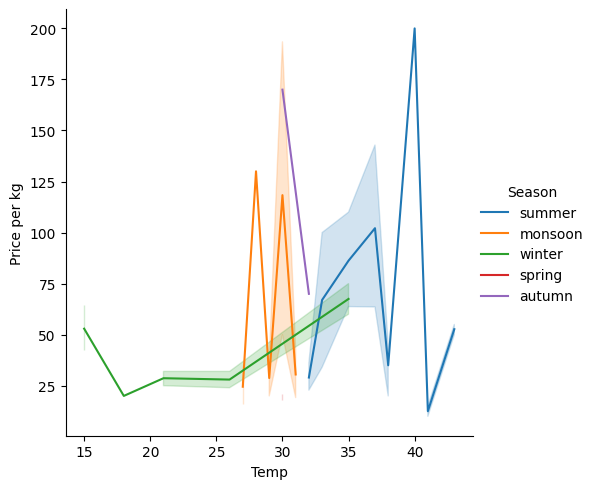

In [32]:
sns.relplot(data=df2, x='Temp', y='Price per kg', hue='Season',kind='line')

In [33]:
fig = px.bar(df, x='Month', y='Price per kg', color='Season', height=400)
fig.show()

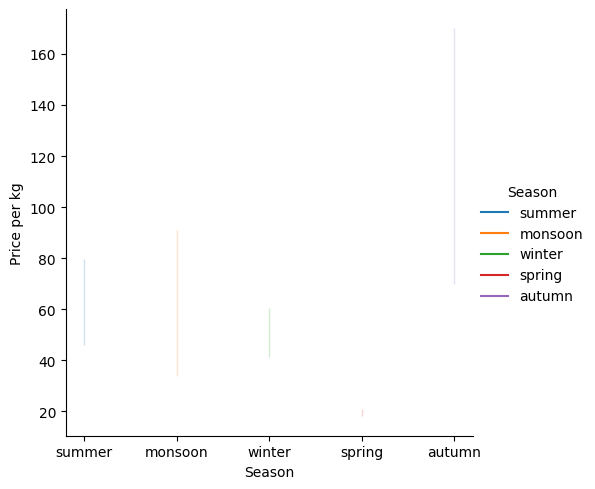

In [34]:
sns.relplot(data=df, x='Season', y='Price per kg', hue='Season', kind='line')

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["Item ID"] = encoder.fit_transform(df["Vegetable"])
df.head()

In [74]:
df['Item ID'].unique()

array([13, 11, 15, 16,  3,  4,  1, 10,  9, 14,  0,  7,  6, 12,  5,  8,  2])

In [77]:
df[df['Item ID']==16]

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg,Item ID
3,tomato,summer,4,35,0,1,80,16
11,tomato,summer,4,35,1,1,120,16
18,tomato,summer,4,35,1,1,90,16
41,tomato,winter,12,15,0,2,35,16
44,tomato,winter,2,15,0,2,50,16
56,tomato,winter,1,15,0,1,25,16
60,tomato,winter,1,15,0,2,20,16
68,tomato,winter,1,15,0,1,30,16
72,tomato,winter,1,15,0,2,22,16
80,tomato,monsoon,7,28,1,2,130,16


In [37]:
df['Vegetable condition'].unique()

array(['fresh', 'avarage', 'scrap'], dtype=object)

In [38]:
df['Deasaster Happen in last 3month'] = df['Deasaster Happen in last 3month'].replace({'no': 0, 'yes': 1})

df['Vegetable condition']=df['Vegetable condition'].replace({'fresh':2,'avarage':1,'scrap':0})
df['Month'] = df['Month'].replace({
        'jan': 1,
        'feb':2,
        'march': 3,
        'apr': 4,
        'may': 5,
        'june': 6,
        'july': 7,
        'aug': 8,
        'sept': 9,
        'oct': 10,
        'nov':11,
        'dec': 12
    })

In [ ]:
#Training model

In [40]:
features = df[['Item ID','Temp','Month','Vegetable condition','Deasaster Happen in last 3month']]
labels = df['Price per kg']

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr=RandomForestRegressor(max_depth=1000, random_state=0)
regr.fit(Xtrain,Ytrain)

RandomForestRegressor(max_depth=1000, random_state=0)

In [44]:
Xtest[0:1]

,Item ID,Temp,Month,Vegetable condition,Deasaster Happen in last 3month
65,2,15,1,2,1


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
y_pred=regr.predict(Xtest)

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(Ytest, y_pred)

0.6593189576716384

In [49]:
y_pred

array([ 41.16083333,  39.83057143,  20.43483333,  66.6075    ,
        30.24333333,  21.2457619 ,  49.00802381,  29.96333333,
        23.45853571,  74.24333333, 142.271     ,  55.5872619 ,
        47.37166667,  33.78241667,  21.7725    ,  85.60916667,
       176.0475    ,  44.50666667,  50.17390476,  32.84333333,
        46.34016667,  50.17390476,  20.63790476,  30.635     ,
        29.6       ])

In [50]:
df2.columns

Index(['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg'],
      dtype='object')

In [51]:
Xtest[0:1]

,Item ID,Temp,Month,Vegetable condition,Deasaster Happen in last 3month
65,2,15,1,2,1


In [52]:
import pickle

In [53]:
pickle_out=open('prediction.pkl','wb')
pickle.dump(regr,pickle_out)
pickle_out.close()

In [ ]:
saved_model_RDF = pickle.dumps(regr)

In [ ]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(regr, 'Veggie_model1.pkl')

['Veggie_model1.pkl']